This data science project explores the killings by police in the USA between 2015 and 2017. The Washington Post has been compiling a database of every fatal shooting in the US by a police officersince January 2015. The Washington Post has been tracking details about each killing inlcuding the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. 

Source of data: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/
https://github.com/washingtonpost/data-police-shootings/blob/master/v1/fatal-police-shootings-data.csv

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. 

In [26]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from collections import Counter


In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [29]:
df_hh_income.isna().values.any()
df_hh_income.fillna(0, inplace=True)

In [30]:
df_fatalities.isna().values.any()
df_fatalities.fillna(0, inplace=True)
df_fatalities.duplicated().values.any()

False

Relationship between Poverty Rates and High School Graduation Rates

In [31]:
# Poverty Rate by US State
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
df_pct_poverty["poverty_rate"].isnull().sum() 
no_nan_poverty = df_pct_poverty.dropna()
grouped_df = no_nan_poverty.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})
grouped_po = grouped_df.sort_values(by="poverty_rate", ascending=False)

fig_poverty = px.bar(grouped_po, 
             x="Geographic Area",
             y="poverty_rate",
             color="poverty_rate",
             color_continuous_scale=px.colors.sequential.Viridis,
             title = "Poverty Rate by US State")
fig_poverty.update_layout(xaxis_title="US States",
                 yaxis_title = "Poverty Rate in Percent")
fig_poverty.show()

In [32]:
#  High School Graduation Rate by US State

df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")

df_pct_completed_hs.percent_completed_hs.isnull().sum()
no_nan_highschool = df_pct_completed_hs.dropna()
grouped_highschool = no_nan_highschool.groupby("Geographic Area", as_index=False).agg({"percent_completed_hs": pd.Series.mean})
grouped_hs = grouped_highschool.sort_values(by="percent_completed_hs", ascending=False)

fig_hs = px.bar(grouped_hs, x="Geographic Area",
             y="percent_completed_hs",
             width=1000,
             height=600, 
             color="percent_completed_hs",
             color_continuous_scale=px.colors.sequential.Viridis,
             title = "High School Graduation Rate by US State",
             labels={"percent_completed_hs": "Completed Highschool in %"}, text_auto='.2s')

fig_hs.update_layout(xaxis_title="US States",
                 yaxis_title = "High School Graduation Rate in Percent")

fig_hs.show()


In [33]:
# Relationship between Poverty Rates and High School Graduation Rates

po_sort_states = grouped_df.sort_values(by="Geographic Area")
hs_sort_states = grouped_highschool.sort_values(by="Geographic Area")

fig_pov_hs = make_subplots(specs=[[{"secondary_y": True}]])
fig_pov_hs.add_trace(go.Scatter(x=po_sort_states["Geographic Area"],
                                y=po_sort_states["poverty_rate"],
                                name="Poverty Rate"),
                                secondary_y=False)

fig_pov_hs.add_trace(go.Scatter(x=hs_sort_states["Geographic Area"],
                                y=hs_sort_states["percent_completed_hs"],
                                name="Highschool Graduation Rate"),
                                secondary_y=True)
                        
fig_pov_hs.update_layout(title_text="Relationship between Poverty Rates and High School Graduation Rates")
fig_pov_hs.update_xaxes(title_text="US States")
fig_pov_hs.update_yaxes(title_text="Poverty Rate in Percent", secondary_y=False, color="blue")
fig_pov_hs.update_yaxes(title_text="Graduation Rate in Percent", secondary_y=True, color="red")

fig_pov_hs.show()


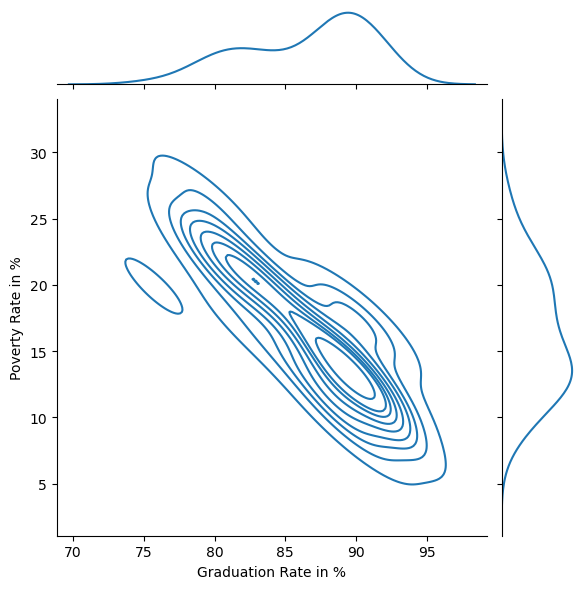

In [34]:
fig_pov_hs2 = sns.jointplot(x=hs_sort_states["percent_completed_hs"],
                            y=po_sort_states["poverty_rate"], 
                            kind="kde")
fig_pov_hs2.ax_joint.set_ylabel("Poverty Rate in %")
fig_pov_hs2.ax_joint.set_xlabel("Graduation Rate in %")

plt.show()

7.14142842854285
Theta1: -0.8987724752765228
Theta0: 93.97917252878234
R-Square: 0.7424783688743338


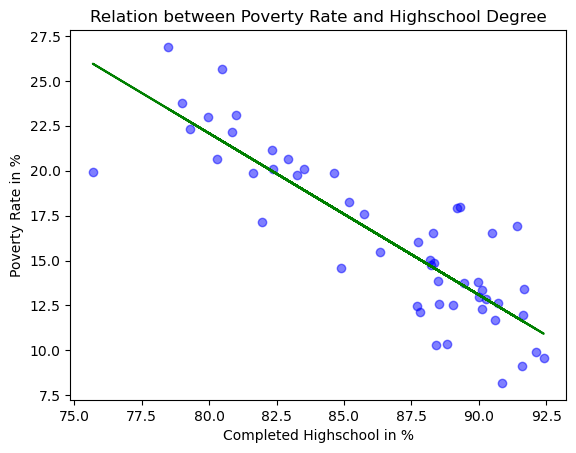

In [35]:
# Linear Regression Analysis

X = pd.DataFrame(hs_sort_states, columns=["percent_completed_hs"])
y = pd.DataFrame(po_sort_states, columns=["poverty_rate"])
print(np.sqrt(len(X)))

regression = LinearRegression()
regression.fit(X, y)

regr_coef = regression.coef_[0][0]
print(f"Theta1: {regr_coef}")

regr_intercept = regression.intercept_[0]
print(f"Theta0: {regr_intercept}")

regr_score = regression.score(X, y)
print(f"R-Square: {regr_score}")

predicted_score = regression.predict(X)

plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Relation between Poverty Rate and Highschool Degree")
plt.xlabel("Completed Highschool in %")
plt.ylabel("Poverty Rate in %")
plt.plot(X, predicted_score, color="green")

plt.show()

Relationship between Killings and Race, Gender, Mental Illness

In [36]:
# Share of Race by State

columns_race = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
df_share_race_city[columns_race] = df_share_race_city[columns_race].apply(pd.to_numeric, errors="coerce", axis=1)

share_race_no_city = df_share_race_city.drop("City", axis=1)
mean_share_race = share_race_no_city.groupby("Geographic area", as_index=False).mean(numeric_only=True)

# Normalising the values of all columns (so that population share does not exceed 100% - mistake in data)
mean_share_race.iloc[:, 1:] = mean_share_race.iloc[:, 1:].div(mean_share_race.iloc[:, 1:].sum(axis=1), axis=0)*100

colors = px.colors.qualitative.Prism
fig_race_share = px.bar(mean_share_race, x="Geographic area",
                        y=columns_race,
                        title="Racial Makeup of Each US State",
                        height=600, width=1000,
                        labels={"variable": "Race"}, 
                        color_discrete_sequence=colors)


fig_race_share.update_layout(xaxis_title="US States",
                             yaxis_title="Racial Share in %")
fig_race_share.update_xaxes(tickmode='linear', nticks=50)
fig_race_share.show()

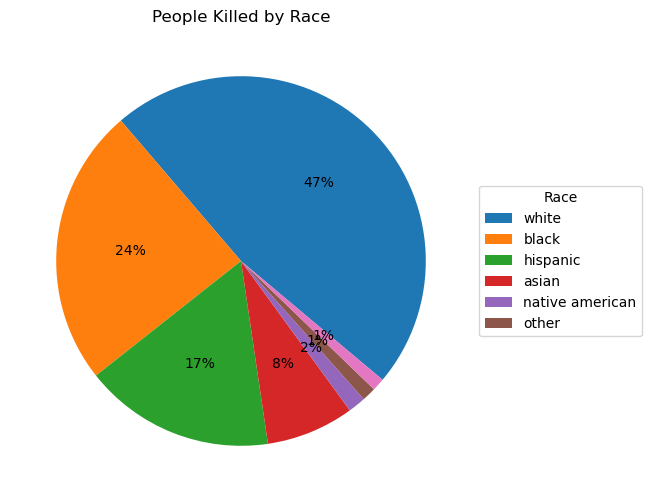

In [37]:
# Pie Chart: People Killed by Race

death_no_nan = df_fatalities.dropna()
counted_race = death_no_nan.value_counts("race")

fig,ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(aspect="equal"))
ax.pie(counted_race.values, autopct='%1.0f%%', startangle=-40)

race = ["white", "black", "hispanic", "asian", "native american", "other"]

ax.legend(race,
          title="Race",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("People Killed by Race")


plt.show()

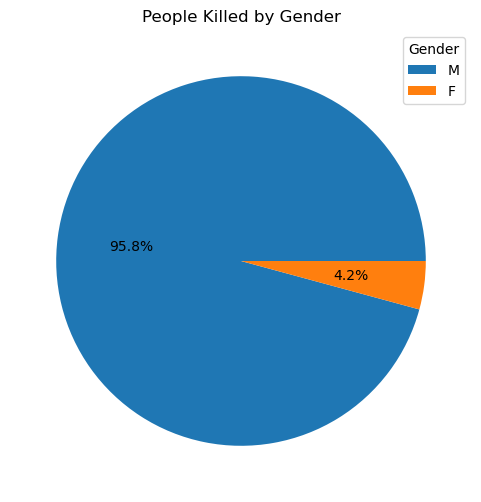

In [38]:
# People Killed by Gender

counted_gender = death_no_nan.value_counts("gender")
counted_gender

fig_gender, ax = plt.subplots(figsize=(15, 6))
ax.pie(counted_gender.values, autopct='%1.1f%%')
ax.set_title("People Killed by Gender")
ax.legend(counted_gender.index, title="Gender")
plt.show()

In [39]:
# Manner of Death by Gender and Age

df_gad = df_fatalities[["gender", "age", "manner_of_death"]]

fig_gender_manner = px.box(df_gad, x="manner_of_death", y="age", color="gender", title="Manner of Death by Age and Gender")
fig_gender_manner.update_layout(xaxis_title="Manner of Death", yaxis_title="Age")
fig_gender_manner.show()

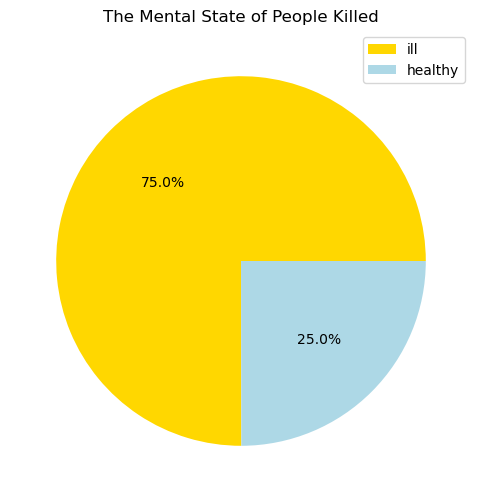

In [40]:
# Mental State
mental_state = df_fatalities.groupby("signs_of_mental_illness").count()

fig_mental, ax = plt.subplots(figsize=(15, 6))
ax.pie(mental_state.id, autopct='%1.1f%%',  colors=['gold', 'lightblue'])
ax.set_title("The Mental State of People Killed")
ax.legend(("ill", "healthy"))
plt.show()

Armed and Unarmed


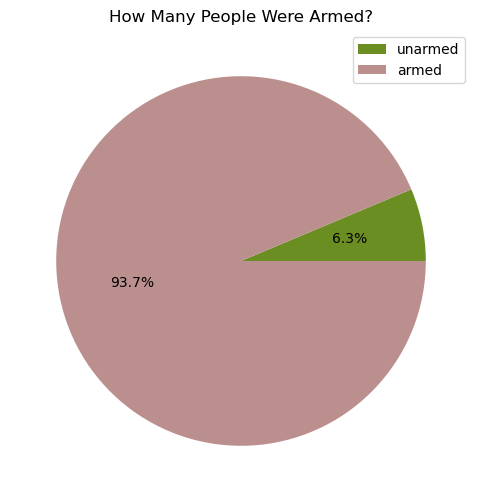

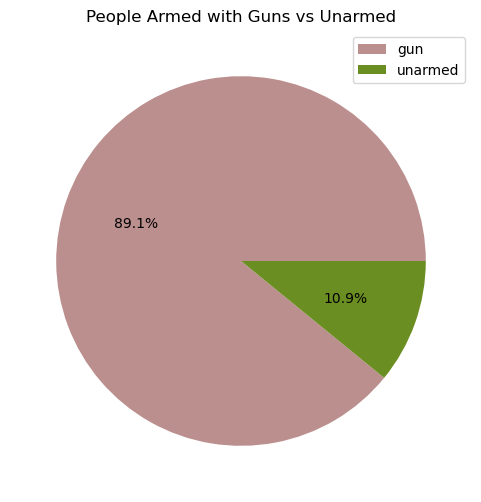

In [41]:
# Un_Armed People

armed_no_zeros = df_fatalities[df_fatalities.armed != 0]
armed_counts = armed_no_zeros.armed.value_counts()
armed_total = armed_counts[armed_counts.index != "unarmed"]
un_armed = [armed_counts.unarmed, armed_counts[armed_counts != "unarmed"].sum()]

fig_un_armed, ax = plt.subplots(figsize=(15, 6))
ax.pie(un_armed, autopct='%1.1f%%', colors=['olivedrab', 'rosybrown'])
ax.set_title("How Many People Were Armed?")
ax.legend(("unarmed", "armed"))
plt.show()

fig_armed = px.bar(x=armed_total.index, y=armed_total.values,
                   color=armed_total.values,
                   color_continuous_scale=px.colors.sequential.Oranges,
                   title="What Kind of Weapons Were Used?")
fig_armed.update_layout(xaxis_title="Arming", yaxis_title="Counts")
fig_armed.show()

gun = armed_total.gun
no_gun = armed_total.sum() - gun

fig_gun, ax = plt.subplots(figsize=(15, 6))
ax.pie([gun, un_armed[0]], autopct='%1.1f%%', colors=['rosybrown', 'olivedrab'])
ax.set_title("People Armed with Guns vs Unarmed")
ax.legend(("gun", "unarmed"))
plt.show()

Analysing Age Distributions

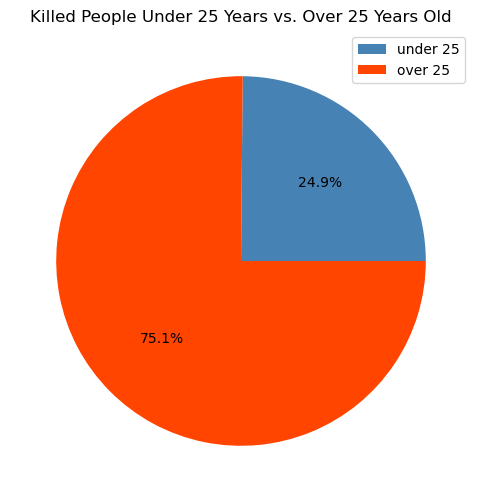

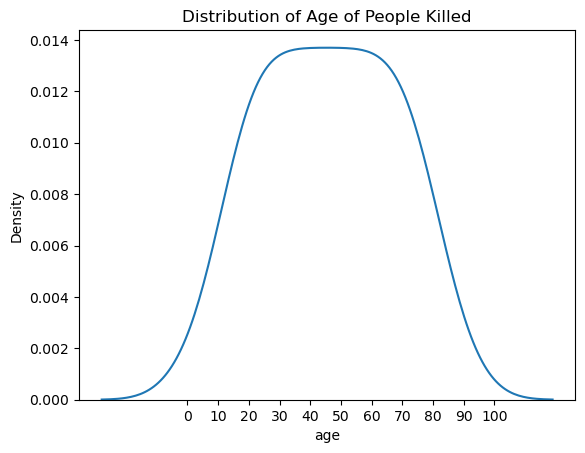

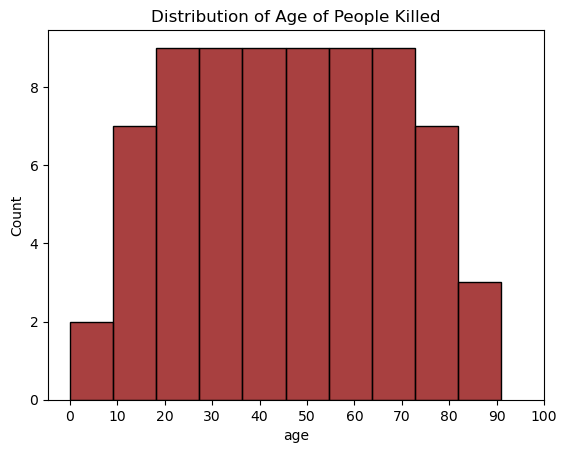

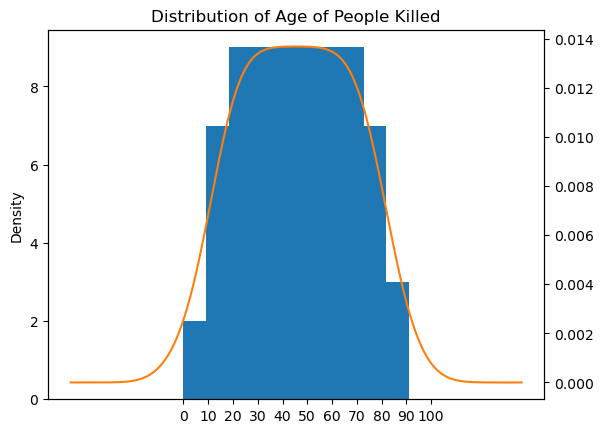

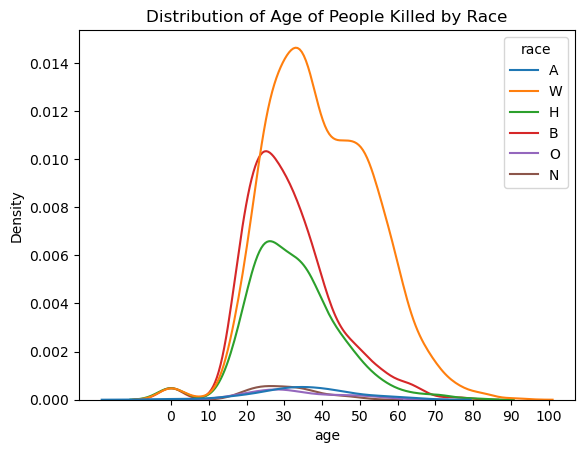

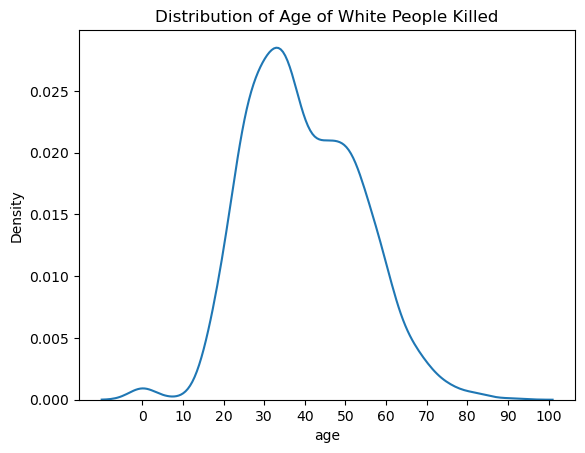

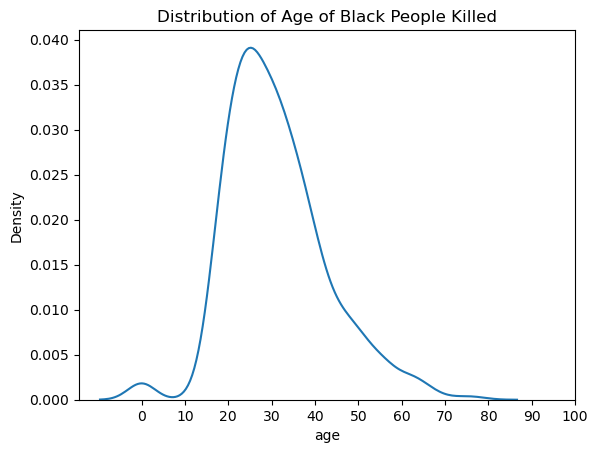

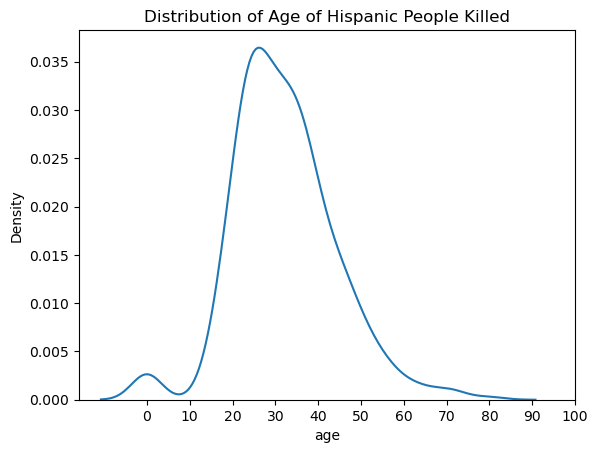

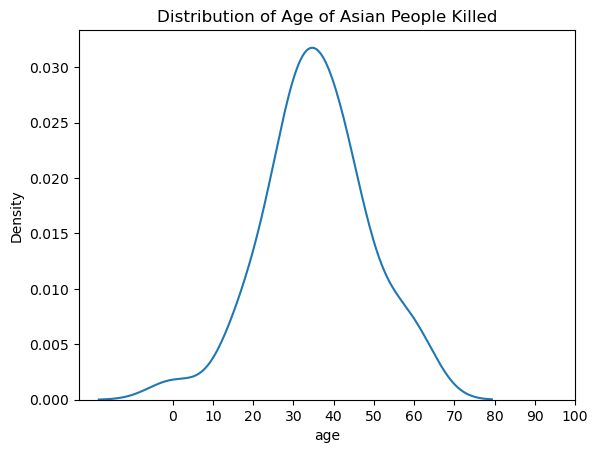

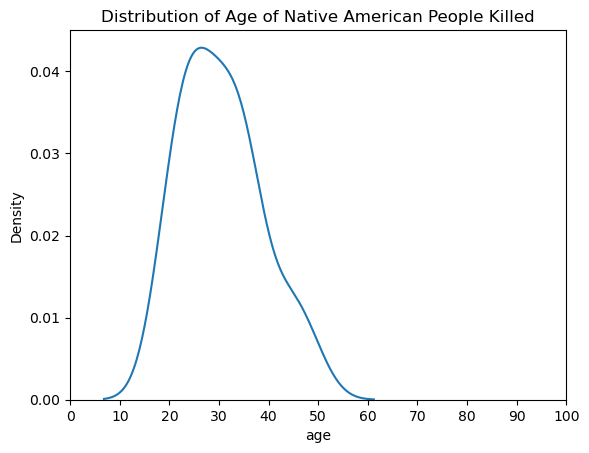

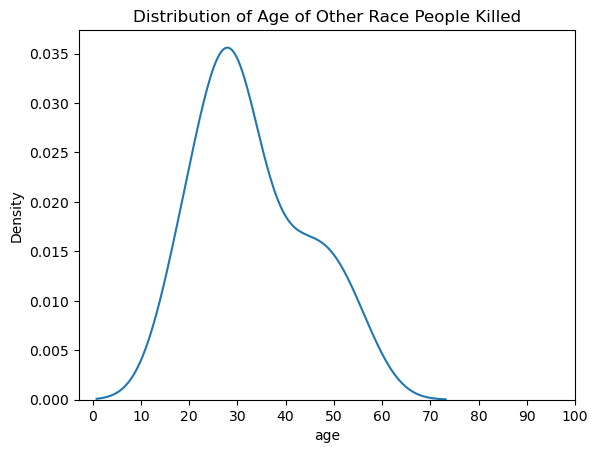

In [42]:
# Age

u25 = (df_fatalities[df_fatalities.age <= 25.00]).count()
o25 = (df_fatalities[df_fatalities.age > 25.00]).count()

fig_age, ax = plt.subplots(figsize=(15, 6))
ax.pie([u25[0], o25[0]], autopct='%1.1f%%', colors=['steelblue', 'orangered'])
ax.set_title("Killed People Under 25 Years vs. Over 25 Years Old")
ax.legend(("under 25", "over 25"))
plt.show()

fat_no_zeros = df_fatalities[df_fatalities.race != 0]
age_distr = fat_no_zeros.groupby("age", as_index=False).count()

fig_age_dis = sns.kdeplot(age_distr, x="age")
plt.title("Distribution of Age of People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

sns.histplot(age_distr, x="age", bins=10, color="darkred")
plt.title("Distribution of Age of People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

ax = age_distr.age.plot(kind='hist')
age_distr.age.plot(kind='kde', ax=ax, secondary_y=True)
plt.title("Distribution of Age of People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_all = sns.kdeplot(fat_no_zeros, x=fat_no_zeros.age, hue=fat_no_zeros.race)
plt.title("Distribution of Age of People Killed by Race")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_w = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "W"], x="age")
plt.title("Distribution of Age of White People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_b = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "B"], x="age")
plt.title("Distribution of Age of Black People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_h = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "H"], x="age")
plt.title("Distribution of Age of Hispanic People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_a = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "A"], x="age")
plt.title("Distribution of Age of Asian People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_na = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "N"], x="age")
plt.title("Distribution of Age of Native American People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

fig_age_o = sns.kdeplot(fat_no_zeros[fat_no_zeros.race == "O"], x="age")
plt.title("Distribution of Age of Other Race People Killed")
plt.xticks(np.arange(0, 100+1, 10))
plt.show()

Analysing the Relationship between Race and Police Killings

In [43]:
# Total Number Killed by Race

total_num = df_fatalities.groupby("race", as_index=False).count().sort_values(by="name", ascending=False)
total_num.drop(0, inplace=True)

total_fig = px.bar(total_num, x="race", y="name", text_auto=True)


total_fig.update_layout(xaxis_title=None, 
                        yaxis_title=None)
total_fig.update_xaxes(tickvals=[0, 1, 2, 3, 4, 5], ticktext=["White", "Black", "Hispanic", "Asian", "Native-American", "Other"])

total_fig.show()

C:\Users\elisa\AppData\Local\Temp\ipykernel_11572\1879865943.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Share of Race of People Killed for the Top 10 Cities')

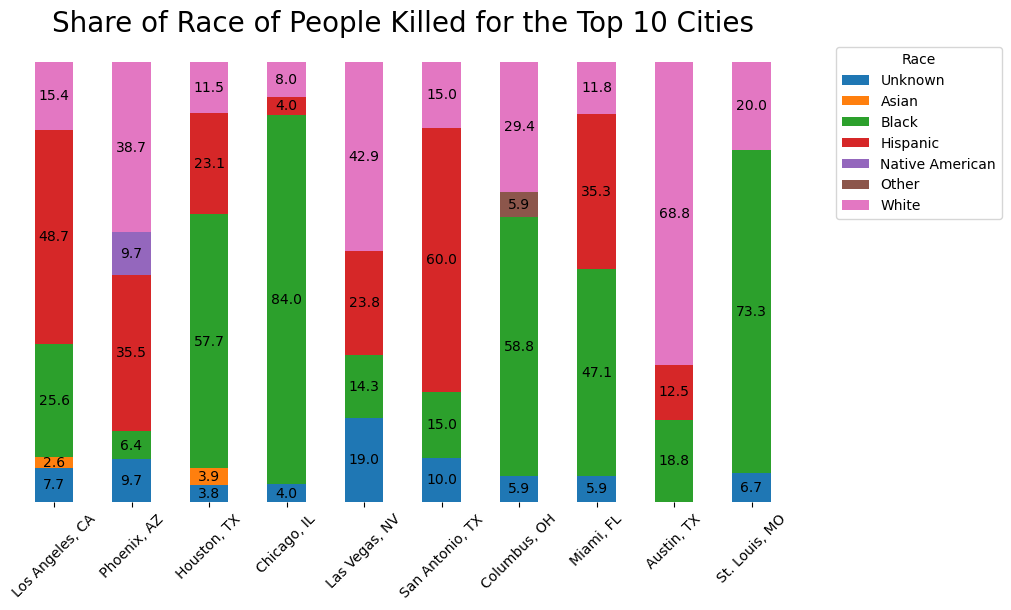

In [44]:
# Top 10 Cities with Highest Numer of Killings
top10_cit = df_fatalities.groupby(["city", "state"], as_index=False).size().sort_values(by="size", ascending=False)[:10]
top10_cit["city, state"] = top10_cit["city"].str.cat(top10_cit["state"].astype(str), sep=", ")

fig_top10 = px.bar(top10_cit, x="city, state",
                   y="size",
                   title="Top 10 Cities with the most Police Killings",
                   color="size", color_continuous_scale=px.colors.sequential.algae, text_auto=True)
fig_top10.update_layout(yaxis_title="Number of Killed People", xaxis_title="")
fig_top10.show()

list_10cities = top10_cit["city, state"].to_list()

race_counts = df_fatalities.groupby(["city", "state", "race"]).size().reset_index()
race_counts["city, state"] = race_counts["city"].str.cat(race_counts["state"].astype(str), sep=", ")
race_counts.rename({0: "sum"}, axis="columns", inplace=True)
top10_race_cities = race_counts[race_counts['city, state'].isin(list_10cities)]


top10_race_cities.race.fillna(0, inplace=True)
new_df = top10_race_cities.pivot(index="city, state", columns="race", values="sum")
new_df.fillna(0, inplace=True)

new_df["total_sum"] = new_df.sum(axis=1, numeric_only=True)
new_df.rename({0: "unknown"}, axis="columns", inplace=True)
sorted_df = new_df.sort_values(by="total_sum", ascending = False)
sorted_df[["unknown", "A", "B", "H", "N", "O", "W"]] = sorted_df[["unknown", "A", "B", "H", "N", "O", "W"]].divide(sorted_df["total_sum"], axis="index").multiply(100).round(2)
sorted_df["total_pct"] = sorted_df.sum(axis=1, numeric_only=True)
pct_race_top10_cities = sorted_df.drop("total_pct", axis=1)
pct_race_top10_cities = pct_race_top10_cities.drop("total_sum", axis=1)

ax = pct_race_top10_cities.plot(kind="bar", stacked=True, xlabel="", ylabel="", figsize=(10,6), rot=45)

for c in ax.containers:
    labels = [str(round(v.get_height(), 1)) if v.get_height() > 0.00 else '' for v in c]
    ax.bar_label(c, fmt='%.1f', labels=labels, label_type='center')
    
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(("Unknown", "Asian", "Black", "Hispanic", "Native American", "Other", "White"), title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Share of Race of People Killed for the Top 10 Cities", fontsize=20)



C:\Users\elisa\AppData\Local\Temp\ipykernel_11572\3122694664.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



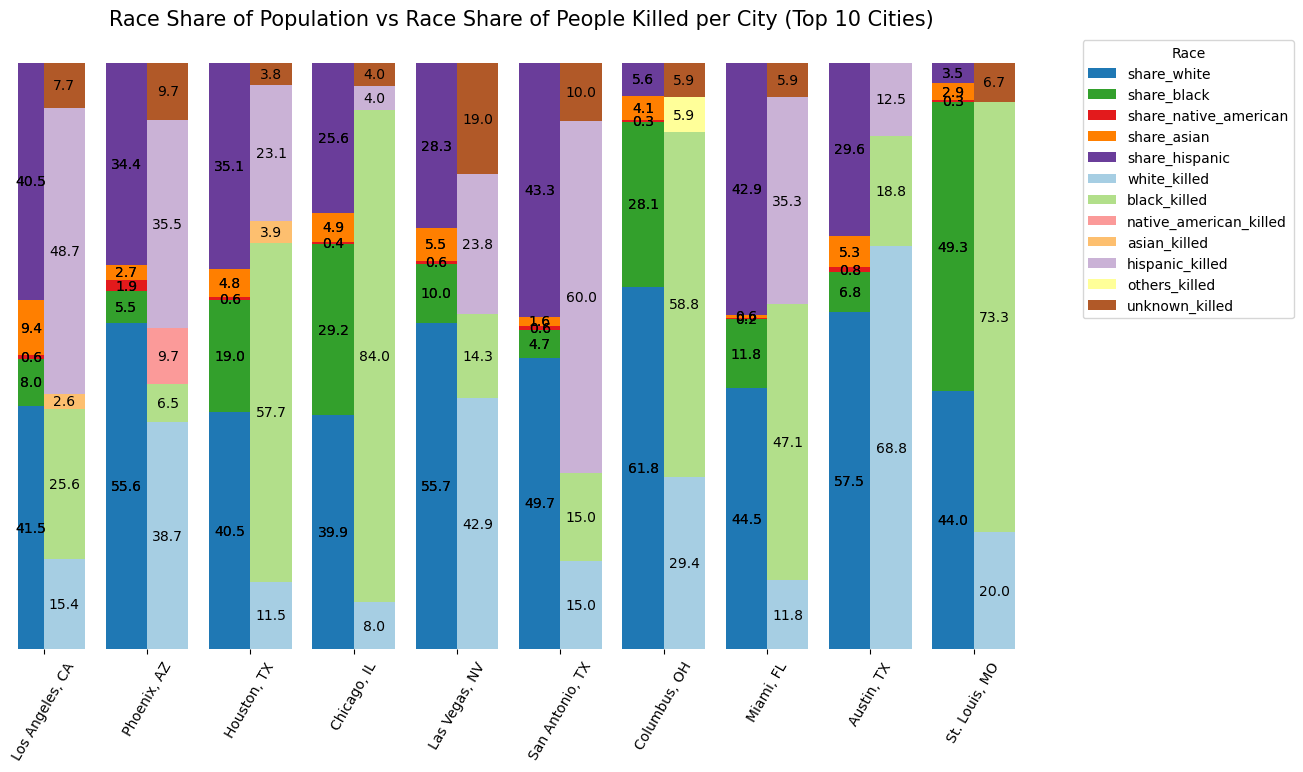

In [45]:
fig, ax = plt.subplots(figsize=(13,8))

pct_race_top10_cities.rename(columns={"unknown": "unknown_killed", "A": "asian_killed", "B": "black_killed", "H": "hispanic_killed", "N": "native_american_killed", "O": "others_killed", "W": "white_killed"}, inplace=True)
share_killed10 = pct_race_top10_cities[['white_killed', 'black_killed', 'native_american_killed', 'asian_killed', 'hispanic_killed', 'others_killed', 'unknown_killed']]

index_order = ["Los Angeles, CA", "Phoenix, AZ", "Houston, TX", "Chicago, IL", "Las Vegas, NV", "San Antonio, TX", "Columbus, OH", "Miami, FL", "Austin, TX", "St. Louis, MO"]
df_share_race_city.loc[:, 'City'] = df_share_race_city['City'].apply(lambda x: x[::-1].split(' ', 1)[1][::-1])
df_share_race_city["city, state"] = df_share_race_city["City"].str.cat( df_share_race_city["Geographic area"].astype(str), sep=", ")
top10_share_race = df_share_race_city[df_share_race_city['city, state'].isin(list_10cities)]
top10_share_race.drop(["Geographic area", "City"], axis=1, inplace=True)
top10_share_race.set_index("city, state", inplace=True)
final_city = top10_share_race.reindex(index_order)
final_city = final_city.div(final_city.sum(axis=1), axis=0)*100
round(final_city, 2)

colors = plt.cm.Paired.colors

final_city.plot(kind="bar", stacked=True, 
                      color=[colors[1], colors[3], colors[5], colors[7], colors[9]], 
                      width=0.4, ax=ax, position=1)
for c in ax.containers:
    labels = [str(round(v.get_height(), 1)) if v.get_height() > 0.00 else '' for v in c]
    ax.bar_label(c, fmt='%.1f', labels=labels, label_type='center')

share_killed10.plot(kind="bar", stacked=True, 
                    color=[colors[0], colors[2], colors[4], colors[6], colors[8], colors[10], colors[11]], 
                    width=0.4, rot=60, ax=ax, position=0)
for c in ax.containers:
    labels = [str(round(v.get_height(), 1)) if v.get_height() > 0.00 else '' for v in c]
    ax.bar_label(c, fmt='%.1f', labels=labels, label_type='center')
    

ax.set_xlim(right=len(top10_share_race)-0.5)
ax.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Race Share of Population vs Race Share of People Killed per City (Top 10 Cities)", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)

plt.show()

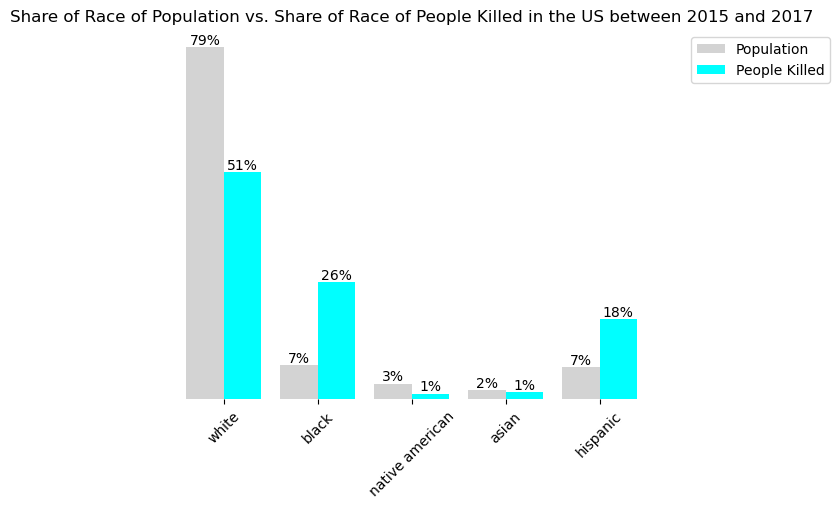

In [46]:
final_city_T = final_city.T
final_city_T["mean_rate"] = final_city_T.mean(axis=1)

mean_share_race.drop("Geographic area", axis=1, inplace=True)
mean_share_race_T = mean_share_race.T
mean_share_race_T.fillna(0)
mean_share_race_T.apply(pd.to_numeric)
mean_share_race_T["mean_rate"] = mean_share_race_T.mean(axis=1, numeric_only=True)

df_killed = total_num[["race", "id"]]
index_order = ["W", "B", "N", "A", "H", "O"]
df_killed = df_killed.set_index("race")
df_killed = df_killed.reindex(index_order)
df_killed["mean_rate"] = df_killed["id"]/df_killed["id"].sum(axis=0)*100


df_killed.drop("O", inplace=True)
fig, ax = plt.subplots()
N = 5
ind = np.arange(N)
bars_all = plt.bar(ind, mean_share_race_T["mean_rate"], width=0.4, color='lightgray') 
bars_killed = plt.bar(ind+0.4, df_killed["mean_rate"], width=0.4, color='cyan') 

ax.set_xticks(ind+0.2)
ax.set_xticklabels(["white", "black", "native american", "asian", "hispanic"], rotation=45)
ax.yaxis.set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


for bar in bars_all + bars_killed:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height))+"%", ha='center', va='bottom')

plt.legend(["Population", "People Killed"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Share of Race of Population vs. Share of Race of People Killed in the US between 2015 and 2017")
plt.show()

Number of Police Killings over Time (2015-2017)

C:\Users\elisa\AppData\Local\Temp\ipykernel_11572\425639197.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



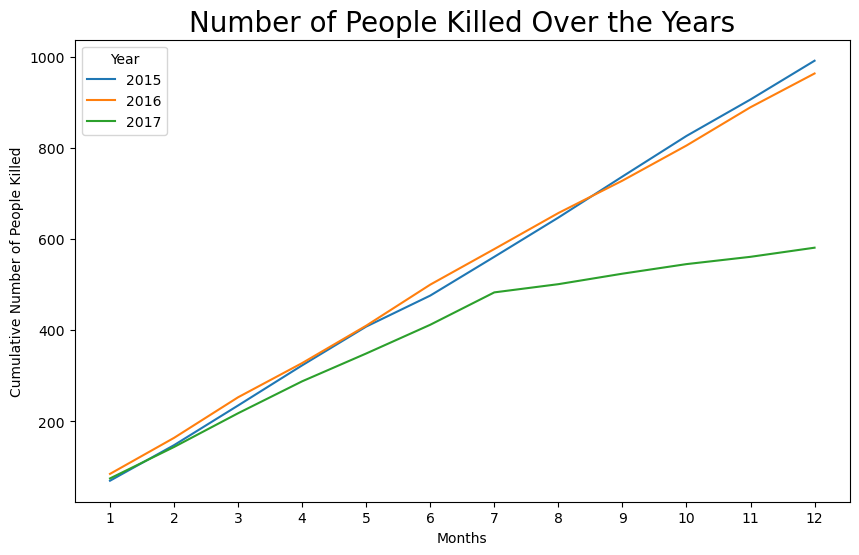

In [47]:
# Time Development
#data of 2017 only available until July

df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities["year"] = df_fatalities.date.dt.year
monthly_counts = df_fatalities.groupby(['year', df_fatalities['date'].dt.month]).size().unstack().cumsum(axis=1)

plt.figure(figsize=(10, 6))

for year in monthly_counts.index:
    plt.plot(monthly_counts.columns, monthly_counts.loc[year], label=str(year))

plt.title('Number of People Killed Over the Years', fontsize=20)
plt.xlabel('Months')
plt.ylabel('Cumulative Number of People Killed')
plt.xticks(range(1, 13, 1))
plt.legend(title='Year', loc='upper left')
plt.show()

In [48]:
#Choropleth Maps

death_states = df_fatalities.groupby("state", as_index=False).size()
fig = go.Figure(data=go.Choropleth(locations=death_states['state'],
                                   z=death_states['size'].astype(int),
                                   locationmode='USA-states',
                                   colorscale='Reds',
                                   colorbar={"title": "Number of Killed People"}))
fig.update_layout(
    title_text='Number of Killed People by US-State between 2015 and 2017',
    geo_scope='usa')
fig.show()



In [49]:
df_pct_poverty.dropna(inplace=True)
fig = go.Figure(data=go.Choropleth(locations=df_pct_poverty['Geographic Area'],
                                   z=df_pct_poverty['poverty_rate'].astype(int),
                                   locationmode='USA-states',
                                   colorscale='Reds',
                                   colorbar={"title": "Poverty Rate"}))
fig.update_layout(
    title_text='Poverty Rate by US-States',
    geo_scope='usa')
fig.show()